## Seuence alignment
This notebook will focus on sequence alignment and distances at sequence level.

In [1]:
import pandas

from helper import parse_fix_matrix, view_alignment
from Bio import AlignIO, SeqIO

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
import panel as pn

from IPython.display import HTML
import panel as pn
import panel.widgets as pnw
pn.extension()

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot, column



aln = AlignIO.read('data/alignment_sequence/Tom_sequences_split_22_11_29.ali','fasta')
p = view_alignment(aln, plot_width=10000)
pn.pane.Bokeh(p)
#pn.show(p)

In [4]:
help(ColumnDataSource)

Help on class ColumnDataSource in module bokeh.models.sources:

class ColumnDataSource(ColumnarDataSource)
 |  ColumnDataSource(*args, **kwargs) -> 'Model'
 |  
 |  Maps names of columns to sequences or arrays.
 |  
 |  The ``ColumnDataSource`` is a fundamental data structure of Bokeh. Most
 |  plots, data tables, etc. will be driven by a ``ColumnDataSource``.
 |  
 |  If the ``ColumnDataSource`` initializer is called with a single argument that
 |  can be any of the following:
 |  
 |  * A Python ``dict`` that maps string names to sequences of values, e.g.
 |    lists, arrays, etc.
 |  
 |    .. code-block:: python
 |  
 |        data = {'x': [1,2,3,4], 'y': np.array([10.0, 20.0, 30.0, 40.0])}
 |  
 |        source = ColumnDataSource(data)
 |  
 |  .. note::
 |      ``ColumnDataSource`` only creates a shallow copy of ``data``. Use e.g.
 |      ``ColumnDataSource(copy.deepcopy(data))`` if initializing from another
 |      ``ColumnDataSource.data`` object that you want to keep independe

In [5]:

! clustalo --in data/raw/Tom_sequences_split_22_11_29.fasta -o data/alignment_sequence/Tom_sequences_split_22_11_29.ali  --distmat-out data/distance_sequence/identity/Tom_sequences_split_22_11_29_kimura.dist --full  --threads 5 --force

## Plot aligned identity distance 

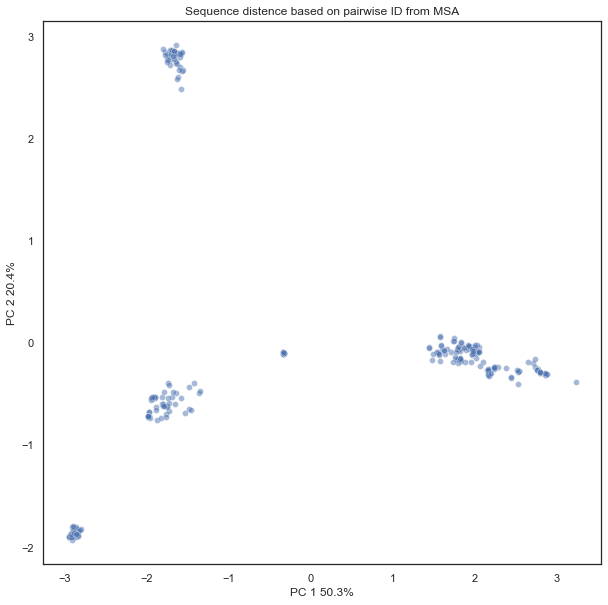

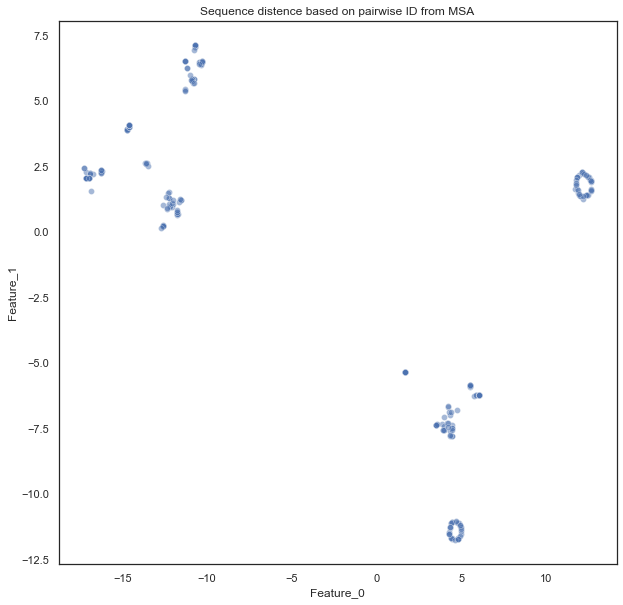

In [41]:
## Identity

dict_dist, np_dist = parse_fix_matrix("data/distance_sequence/identity/Tom_sequences_split_22_11_29_kimura.dist")

## PCA

pca = PCA(n_components=2)
X_embedded_pca = pca.fit_transform(np_dist)
list_explaned_varience = [ round(i, 3) for i in  pca.fit(np_dist).explained_variance_ratio_]


data_pca = {f"PC 1 {list_explaned_varience[0]*100}%":[], f"PC 2 {list_explaned_varience[1]*100}%":[]}
for x in X_embedded_pca:
    data_pca[f"PC 1 {list_explaned_varience[0]*100}%"].append(x[0])
    data_pca[f"PC 2 {list_explaned_varience[1]*100}%"].append(x[1])

f, ax = plt.subplots(figsize=[10,10])

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=data_pca, x=f"PC 1 {list_explaned_varience[0]*100}%", y=f"PC 2 {list_explaned_varience[1]*100}%", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax)
ax.set_title("Sequence distence based on pairwise ID from MSA")
plt.show()



## T-SNE



X_embedded_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50).fit_transform(np_dist)

# make_dict

data_t_sne = {"Feature_0":[], "Feature_1":[]}
for x in X_embedded_tsne:
    data_t_sne["Feature_0"].append(x[0])
    data_t_sne["Feature_1"].append(x[1])


f, ax = plt.subplots(figsize=[10,10])

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=data_t_sne, x="Feature_0", y="Feature_1", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax)
ax.set_title("Sequence distence based on pairwise ID from MSA")
plt.show()

## U-MAP



Help on class ColumnDataSource in module bokeh.models.sources:

class ColumnDataSource(ColumnarDataSource)
 |  ColumnDataSource(*args, **kwargs) -> 'Model'
 |  
 |  Maps names of columns to sequences or arrays.
 |  
 |  The ``ColumnDataSource`` is a fundamental data structure of Bokeh. Most
 |  plots, data tables, etc. will be driven by a ``ColumnDataSource``.
 |  
 |  If the ``ColumnDataSource`` initializer is called with a single argument that
 |  can be any of the following:
 |  
 |  * A Python ``dict`` that maps string names to sequences of values, e.g.
 |    lists, arrays, etc.
 |  
 |    .. code-block:: python
 |  
 |        data = {'x': [1,2,3,4], 'y': np.array([10.0, 20.0, 30.0, 40.0])}
 |  
 |        source = ColumnDataSource(data)
 |  
 |  .. note::
 |      ``ColumnDataSource`` only creates a shallow copy of ``data``. Use e.g.
 |      ``ColumnDataSource(copy.deepcopy(data))`` if initializing from another
 |      ``ColumnDataSource.data`` object that you want to keep independe